## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.1ms	remaining: 52s
1:	learn: 0.9301086	total: 55.8ms	remaining: 27.8s
2:	learn: 0.9005637	total: 58.9ms	remaining: 19.6s
3:	learn: 0.8720983	total: 61.9ms	remaining: 15.4s
4:	learn: 0.8467410	total: 65ms	remaining: 12.9s
5:	learn: 0.8226672	total: 71ms	remaining: 11.8s
6:	learn: 0.7994702	total: 74.8ms	remaining: 10.6s
7:	learn: 0.7784272	total: 82.1ms	remaining: 10.2s
8:	learn: 0.7602192	total: 93.3ms	remaining: 10.3s
9:	learn: 0.7412421	total: 96.4ms	remaining: 9.54s
10:	learn: 0.7247930	total: 99.5ms	remaining: 8.95s
11:	learn: 0.7089951	total: 103ms	remaining: 8.47s
12:	learn: 0.6951345	total: 106ms	remaining: 8.04s
13:	learn: 0.6809276	total: 109ms	remaining: 7.67s
14:	learn: 0.6692630	total: 112ms	remaining: 7.34s
15:	learn: 0.6588323	total: 115ms	remaining: 7.06s
16:	learn: 0.6472700	total: 118ms	remaining: 6.81s
17:	learn: 0.6379982	total: 121ms	remaining: 6.58s
18:	learn: 0.6294674	total: 124ms	remaining: 6.38s
19:	le

28:	learn: 0.5632987	total: 154ms	remaining: 5.14s
29:	learn: 0.5571384	total: 157ms	remaining: 5.06s
30:	learn: 0.5536829	total: 160ms	remaining: 4.99s
31:	learn: 0.5505614	total: 163ms	remaining: 4.92s
32:	learn: 0.5475131	total: 171ms	remaining: 5.02s
33:	learn: 0.5445860	total: 174ms	remaining: 4.95s
34:	learn: 0.5398906	total: 177ms	remaining: 4.89s
35:	learn: 0.5363592	total: 180ms	remaining: 4.82s
36:	learn: 0.5337228	total: 183ms	remaining: 4.75s
37:	learn: 0.5296892	total: 186ms	remaining: 4.7s
38:	learn: 0.5255485	total: 188ms	remaining: 4.64s
39:	learn: 0.5217941	total: 191ms	remaining: 4.59s
40:	learn: 0.5196440	total: 195ms	remaining: 4.55s
41:	learn: 0.5170220	total: 197ms	remaining: 4.5s
42:	learn: 0.5141148	total: 200ms	remaining: 4.46s
43:	learn: 0.5116444	total: 204ms	remaining: 4.42s
44:	learn: 0.5100547	total: 206ms	remaining: 4.38s
45:	learn: 0.5069096	total: 209ms	remaining: 4.33s
46:	learn: 0.5051685	total: 212ms	remaining: 4.3s
47:	learn: 0.5033968	total: 215ms	

90:	learn: 0.4559969	total: 345ms	remaining: 3.45s
91:	learn: 0.4549716	total: 350ms	remaining: 3.46s
92:	learn: 0.4544919	total: 353ms	remaining: 3.44s
93:	learn: 0.4537693	total: 356ms	remaining: 3.43s
94:	learn: 0.4532673	total: 359ms	remaining: 3.42s
95:	learn: 0.4526987	total: 362ms	remaining: 3.41s
96:	learn: 0.4520952	total: 365ms	remaining: 3.4s
97:	learn: 0.4513919	total: 368ms	remaining: 3.39s
98:	learn: 0.4503747	total: 371ms	remaining: 3.38s
99:	learn: 0.4494783	total: 374ms	remaining: 3.36s
100:	learn: 0.4487329	total: 376ms	remaining: 3.35s
101:	learn: 0.4481325	total: 379ms	remaining: 3.34s
102:	learn: 0.4475445	total: 382ms	remaining: 3.33s
103:	learn: 0.4466014	total: 385ms	remaining: 3.31s
104:	learn: 0.4461730	total: 387ms	remaining: 3.3s
105:	learn: 0.4457259	total: 390ms	remaining: 3.29s
106:	learn: 0.4451085	total: 393ms	remaining: 3.28s
107:	learn: 0.4447909	total: 395ms	remaining: 3.27s
108:	learn: 0.4440936	total: 403ms	remaining: 3.29s
109:	learn: 0.4435519	to

155:	learn: 0.4225404	total: 538ms	remaining: 2.91s
156:	learn: 0.4222831	total: 541ms	remaining: 2.91s
157:	learn: 0.4218088	total: 544ms	remaining: 2.9s
158:	learn: 0.4213239	total: 547ms	remaining: 2.89s
159:	learn: 0.4210022	total: 549ms	remaining: 2.88s
160:	learn: 0.4201256	total: 552ms	remaining: 2.88s
161:	learn: 0.4197073	total: 555ms	remaining: 2.87s
162:	learn: 0.4192052	total: 558ms	remaining: 2.87s
163:	learn: 0.4187949	total: 562ms	remaining: 2.86s
164:	learn: 0.4184572	total: 565ms	remaining: 2.86s
165:	learn: 0.4180680	total: 568ms	remaining: 2.85s
166:	learn: 0.4176884	total: 571ms	remaining: 2.85s
167:	learn: 0.4173026	total: 574ms	remaining: 2.84s
168:	learn: 0.4170486	total: 577ms	remaining: 2.83s
169:	learn: 0.4165960	total: 580ms	remaining: 2.83s
170:	learn: 0.4161870	total: 583ms	remaining: 2.83s
171:	learn: 0.4156228	total: 586ms	remaining: 2.82s
172:	learn: 0.4153041	total: 589ms	remaining: 2.81s
173:	learn: 0.4148857	total: 592ms	remaining: 2.81s
174:	learn: 0

217:	learn: 0.3992639	total: 726ms	remaining: 2.6s
218:	learn: 0.3989428	total: 729ms	remaining: 2.6s
219:	learn: 0.3986243	total: 732ms	remaining: 2.59s
220:	learn: 0.3982897	total: 735ms	remaining: 2.59s
221:	learn: 0.3981001	total: 738ms	remaining: 2.58s
222:	learn: 0.3978579	total: 741ms	remaining: 2.58s
223:	learn: 0.3976462	total: 744ms	remaining: 2.58s
224:	learn: 0.3973704	total: 747ms	remaining: 2.57s
225:	learn: 0.3971729	total: 750ms	remaining: 2.57s
226:	learn: 0.3968841	total: 753ms	remaining: 2.56s
227:	learn: 0.3965787	total: 756ms	remaining: 2.56s
228:	learn: 0.3963073	total: 759ms	remaining: 2.56s
229:	learn: 0.3960925	total: 762ms	remaining: 2.55s
230:	learn: 0.3957018	total: 765ms	remaining: 2.55s
231:	learn: 0.3954162	total: 768ms	remaining: 2.54s
232:	learn: 0.3951665	total: 771ms	remaining: 2.54s
233:	learn: 0.3949269	total: 774ms	remaining: 2.53s
234:	learn: 0.3945894	total: 777ms	remaining: 2.53s
235:	learn: 0.3944181	total: 780ms	remaining: 2.52s
236:	learn: 0.

282:	learn: 0.3832767	total: 916ms	remaining: 2.32s
283:	learn: 0.3831676	total: 919ms	remaining: 2.32s
284:	learn: 0.3830010	total: 922ms	remaining: 2.31s
285:	learn: 0.3826742	total: 925ms	remaining: 2.31s
286:	learn: 0.3824534	total: 928ms	remaining: 2.31s
287:	learn: 0.3821767	total: 931ms	remaining: 2.3s
288:	learn: 0.3819748	total: 934ms	remaining: 2.3s
289:	learn: 0.3817667	total: 937ms	remaining: 2.29s
290:	learn: 0.3815253	total: 941ms	remaining: 2.29s
291:	learn: 0.3813529	total: 943ms	remaining: 2.29s
292:	learn: 0.3812172	total: 947ms	remaining: 2.28s
293:	learn: 0.3809978	total: 949ms	remaining: 2.28s
294:	learn: 0.3807825	total: 952ms	remaining: 2.27s
295:	learn: 0.3805940	total: 955ms	remaining: 2.27s
296:	learn: 0.3801959	total: 958ms	remaining: 2.27s
297:	learn: 0.3799439	total: 961ms	remaining: 2.26s
298:	learn: 0.3797228	total: 964ms	remaining: 2.26s
299:	learn: 0.3795554	total: 967ms	remaining: 2.26s
300:	learn: 0.3793733	total: 970ms	remaining: 2.25s
301:	learn: 0.

347:	learn: 0.3705958	total: 1.11s	remaining: 2.07s
348:	learn: 0.3703798	total: 1.11s	remaining: 2.07s
349:	learn: 0.3701923	total: 1.11s	remaining: 2.06s
350:	learn: 0.3700067	total: 1.11s	remaining: 2.06s
351:	learn: 0.3698930	total: 1.12s	remaining: 2.06s
352:	learn: 0.3697314	total: 1.12s	remaining: 2.05s
353:	learn: 0.3695617	total: 1.12s	remaining: 2.05s
354:	learn: 0.3694397	total: 1.13s	remaining: 2.05s
355:	learn: 0.3692589	total: 1.13s	remaining: 2.04s
356:	learn: 0.3691107	total: 1.13s	remaining: 2.04s
357:	learn: 0.3689645	total: 1.13s	remaining: 2.03s
358:	learn: 0.3687886	total: 1.14s	remaining: 2.03s
359:	learn: 0.3686485	total: 1.14s	remaining: 2.03s
360:	learn: 0.3685749	total: 1.14s	remaining: 2.02s
361:	learn: 0.3683909	total: 1.15s	remaining: 2.02s
362:	learn: 0.3682710	total: 1.15s	remaining: 2.02s
363:	learn: 0.3681254	total: 1.15s	remaining: 2.01s
364:	learn: 0.3679761	total: 1.15s	remaining: 2.01s
365:	learn: 0.3677932	total: 1.16s	remaining: 2s
366:	learn: 0.3

413:	learn: 0.3599094	total: 1.3s	remaining: 1.84s
414:	learn: 0.3597887	total: 1.3s	remaining: 1.84s
415:	learn: 0.3595791	total: 1.3s	remaining: 1.83s
416:	learn: 0.3594487	total: 1.31s	remaining: 1.83s
417:	learn: 0.3592759	total: 1.31s	remaining: 1.82s
418:	learn: 0.3591088	total: 1.31s	remaining: 1.82s
419:	learn: 0.3589470	total: 1.32s	remaining: 1.82s
420:	learn: 0.3587972	total: 1.32s	remaining: 1.81s
421:	learn: 0.3586831	total: 1.32s	remaining: 1.81s
422:	learn: 0.3585620	total: 1.32s	remaining: 1.81s
423:	learn: 0.3584427	total: 1.33s	remaining: 1.8s
424:	learn: 0.3583044	total: 1.33s	remaining: 1.8s
425:	learn: 0.3581698	total: 1.33s	remaining: 1.8s
426:	learn: 0.3580461	total: 1.34s	remaining: 1.79s
427:	learn: 0.3579182	total: 1.34s	remaining: 1.79s
428:	learn: 0.3577521	total: 1.34s	remaining: 1.78s
429:	learn: 0.3576138	total: 1.34s	remaining: 1.78s
430:	learn: 0.3575528	total: 1.35s	remaining: 1.78s
431:	learn: 0.3574686	total: 1.35s	remaining: 1.77s
432:	learn: 0.3572

476:	learn: 0.3510044	total: 1.49s	remaining: 1.64s
477:	learn: 0.3509121	total: 1.49s	remaining: 1.63s
478:	learn: 0.3507270	total: 1.5s	remaining: 1.63s
479:	learn: 0.3506003	total: 1.5s	remaining: 1.63s
480:	learn: 0.3505111	total: 1.5s	remaining: 1.62s
481:	learn: 0.3503906	total: 1.51s	remaining: 1.62s
482:	learn: 0.3501522	total: 1.51s	remaining: 1.61s
483:	learn: 0.3500494	total: 1.51s	remaining: 1.61s
484:	learn: 0.3498921	total: 1.51s	remaining: 1.61s
485:	learn: 0.3497143	total: 1.52s	remaining: 1.6s
486:	learn: 0.3496172	total: 1.52s	remaining: 1.6s
487:	learn: 0.3494609	total: 1.52s	remaining: 1.6s
488:	learn: 0.3493200	total: 1.53s	remaining: 1.6s
489:	learn: 0.3491550	total: 1.53s	remaining: 1.59s
490:	learn: 0.3490323	total: 1.53s	remaining: 1.59s
491:	learn: 0.3488767	total: 1.54s	remaining: 1.59s
492:	learn: 0.3487285	total: 1.54s	remaining: 1.58s
493:	learn: 0.3486318	total: 1.54s	remaining: 1.58s
494:	learn: 0.3485016	total: 1.54s	remaining: 1.57s
495:	learn: 0.34840

539:	learn: 0.3428024	total: 1.69s	remaining: 1.44s
540:	learn: 0.3426641	total: 1.69s	remaining: 1.43s
541:	learn: 0.3425885	total: 1.69s	remaining: 1.43s
542:	learn: 0.3424695	total: 1.69s	remaining: 1.43s
543:	learn: 0.3423997	total: 1.7s	remaining: 1.42s
544:	learn: 0.3422315	total: 1.7s	remaining: 1.42s
545:	learn: 0.3421242	total: 1.7s	remaining: 1.42s
546:	learn: 0.3419673	total: 1.71s	remaining: 1.41s
547:	learn: 0.3418121	total: 1.71s	remaining: 1.41s
548:	learn: 0.3416228	total: 1.71s	remaining: 1.41s
549:	learn: 0.3414331	total: 1.71s	remaining: 1.4s
550:	learn: 0.3413090	total: 1.72s	remaining: 1.4s
551:	learn: 0.3411591	total: 1.72s	remaining: 1.4s
552:	learn: 0.3410901	total: 1.72s	remaining: 1.39s
553:	learn: 0.3409923	total: 1.73s	remaining: 1.39s
554:	learn: 0.3408730	total: 1.73s	remaining: 1.39s
555:	learn: 0.3408310	total: 1.73s	remaining: 1.38s
556:	learn: 0.3407365	total: 1.73s	remaining: 1.38s
557:	learn: 0.3406506	total: 1.74s	remaining: 1.38s
558:	learn: 0.3405

606:	learn: 0.3356597	total: 1.88s	remaining: 1.22s
607:	learn: 0.3355448	total: 1.88s	remaining: 1.21s
608:	learn: 0.3354512	total: 1.88s	remaining: 1.21s
609:	learn: 0.3353398	total: 1.89s	remaining: 1.21s
610:	learn: 0.3352669	total: 1.89s	remaining: 1.2s
611:	learn: 0.3351716	total: 1.89s	remaining: 1.2s
612:	learn: 0.3351155	total: 1.9s	remaining: 1.2s
613:	learn: 0.3350041	total: 1.91s	remaining: 1.2s
614:	learn: 0.3349098	total: 1.91s	remaining: 1.2s
615:	learn: 0.3348304	total: 1.91s	remaining: 1.19s
616:	learn: 0.3347009	total: 1.92s	remaining: 1.19s
617:	learn: 0.3346458	total: 1.92s	remaining: 1.19s
618:	learn: 0.3345381	total: 1.92s	remaining: 1.18s
619:	learn: 0.3344101	total: 1.92s	remaining: 1.18s
620:	learn: 0.3343267	total: 1.93s	remaining: 1.18s
621:	learn: 0.3342275	total: 1.93s	remaining: 1.17s
622:	learn: 0.3341456	total: 1.93s	remaining: 1.17s
623:	learn: 0.3340640	total: 1.94s	remaining: 1.17s
624:	learn: 0.3339122	total: 1.94s	remaining: 1.16s
625:	learn: 0.3337

668:	learn: 0.3294195	total: 2.07s	remaining: 1.02s
669:	learn: 0.3293185	total: 2.08s	remaining: 1.02s
670:	learn: 0.3292086	total: 2.08s	remaining: 1.02s
671:	learn: 0.3289913	total: 2.08s	remaining: 1.02s
672:	learn: 0.3288859	total: 2.08s	remaining: 1.01s
673:	learn: 0.3288145	total: 2.09s	remaining: 1.01s
674:	learn: 0.3286969	total: 2.09s	remaining: 1.01s
675:	learn: 0.3286108	total: 2.09s	remaining: 1s
676:	learn: 0.3285218	total: 2.1s	remaining: 1s
677:	learn: 0.3284620	total: 2.1s	remaining: 997ms
678:	learn: 0.3283999	total: 2.1s	remaining: 994ms
679:	learn: 0.3283506	total: 2.1s	remaining: 991ms
680:	learn: 0.3282208	total: 2.11s	remaining: 987ms
681:	learn: 0.3281020	total: 2.11s	remaining: 984ms
682:	learn: 0.3280328	total: 2.11s	remaining: 981ms
683:	learn: 0.3279574	total: 2.12s	remaining: 978ms
684:	learn: 0.3278928	total: 2.12s	remaining: 975ms
685:	learn: 0.3278094	total: 2.12s	remaining: 972ms
686:	learn: 0.3277178	total: 2.13s	remaining: 969ms
687:	learn: 0.3276684	

731:	learn: 0.3236654	total: 2.27s	remaining: 829ms
732:	learn: 0.3235938	total: 2.27s	remaining: 826ms
733:	learn: 0.3235120	total: 2.27s	remaining: 823ms
734:	learn: 0.3234421	total: 2.27s	remaining: 820ms
735:	learn: 0.3233367	total: 2.28s	remaining: 816ms
736:	learn: 0.3232438	total: 2.28s	remaining: 813ms
737:	learn: 0.3231289	total: 2.28s	remaining: 810ms
738:	learn: 0.3230697	total: 2.28s	remaining: 807ms
739:	learn: 0.3229734	total: 2.29s	remaining: 804ms
740:	learn: 0.3228697	total: 2.29s	remaining: 800ms
741:	learn: 0.3227984	total: 2.29s	remaining: 797ms
742:	learn: 0.3226895	total: 2.29s	remaining: 794ms
743:	learn: 0.3225924	total: 2.3s	remaining: 791ms
744:	learn: 0.3225096	total: 2.3s	remaining: 787ms
745:	learn: 0.3224088	total: 2.3s	remaining: 784ms
746:	learn: 0.3223202	total: 2.31s	remaining: 781ms
747:	learn: 0.3222404	total: 2.31s	remaining: 778ms
748:	learn: 0.3221810	total: 2.31s	remaining: 775ms
749:	learn: 0.3221342	total: 2.31s	remaining: 772ms
750:	learn: 0.3

800:	learn: 0.3176826	total: 2.46s	remaining: 610ms
801:	learn: 0.3176217	total: 2.46s	remaining: 607ms
802:	learn: 0.3174842	total: 2.46s	remaining: 604ms
803:	learn: 0.3173800	total: 2.46s	remaining: 601ms
804:	learn: 0.3172892	total: 2.47s	remaining: 598ms
805:	learn: 0.3172199	total: 2.47s	remaining: 595ms
806:	learn: 0.3171379	total: 2.47s	remaining: 592ms
807:	learn: 0.3170699	total: 2.48s	remaining: 589ms
808:	learn: 0.3170027	total: 2.48s	remaining: 585ms
809:	learn: 0.3169244	total: 2.48s	remaining: 582ms
810:	learn: 0.3168075	total: 2.48s	remaining: 579ms
811:	learn: 0.3167047	total: 2.49s	remaining: 576ms
812:	learn: 0.3166132	total: 2.49s	remaining: 573ms
813:	learn: 0.3165391	total: 2.49s	remaining: 570ms
814:	learn: 0.3164726	total: 2.5s	remaining: 567ms
815:	learn: 0.3164087	total: 2.5s	remaining: 564ms
816:	learn: 0.3163590	total: 2.5s	remaining: 560ms
817:	learn: 0.3162644	total: 2.5s	remaining: 557ms
818:	learn: 0.3161739	total: 2.51s	remaining: 554ms
819:	learn: 0.31

867:	learn: 0.3124401	total: 2.65s	remaining: 402ms
868:	learn: 0.3123064	total: 2.65s	remaining: 399ms
869:	learn: 0.3122328	total: 2.65s	remaining: 396ms
870:	learn: 0.3121623	total: 2.65s	remaining: 393ms
871:	learn: 0.3121072	total: 2.65s	remaining: 390ms
872:	learn: 0.3120356	total: 2.66s	remaining: 387ms
873:	learn: 0.3119020	total: 2.66s	remaining: 384ms
874:	learn: 0.3118603	total: 2.66s	remaining: 381ms
875:	learn: 0.3117861	total: 2.67s	remaining: 378ms
876:	learn: 0.3116810	total: 2.67s	remaining: 374ms
877:	learn: 0.3116088	total: 2.67s	remaining: 371ms
878:	learn: 0.3115190	total: 2.67s	remaining: 368ms
879:	learn: 0.3114687	total: 2.68s	remaining: 365ms
880:	learn: 0.3113934	total: 2.68s	remaining: 362ms
881:	learn: 0.3113378	total: 2.69s	remaining: 359ms
882:	learn: 0.3112367	total: 2.69s	remaining: 356ms
883:	learn: 0.3111915	total: 2.69s	remaining: 353ms
884:	learn: 0.3111075	total: 2.69s	remaining: 350ms
885:	learn: 0.3110486	total: 2.7s	remaining: 347ms
886:	learn: 0

932:	learn: 0.3077165	total: 2.84s	remaining: 204ms
933:	learn: 0.3076207	total: 2.84s	remaining: 201ms
934:	learn: 0.3075333	total: 2.84s	remaining: 198ms
935:	learn: 0.3074829	total: 2.85s	remaining: 195ms
936:	learn: 0.3074088	total: 2.85s	remaining: 192ms
937:	learn: 0.3073356	total: 2.85s	remaining: 189ms
938:	learn: 0.3072158	total: 2.85s	remaining: 186ms
939:	learn: 0.3071693	total: 2.86s	remaining: 182ms
940:	learn: 0.3071043	total: 2.86s	remaining: 179ms
941:	learn: 0.3070506	total: 2.86s	remaining: 176ms
942:	learn: 0.3070046	total: 2.87s	remaining: 173ms
943:	learn: 0.3069525	total: 2.87s	remaining: 170ms
944:	learn: 0.3068968	total: 2.87s	remaining: 167ms
945:	learn: 0.3068564	total: 2.88s	remaining: 164ms
946:	learn: 0.3067279	total: 2.88s	remaining: 161ms
947:	learn: 0.3066517	total: 2.88s	remaining: 158ms
948:	learn: 0.3066014	total: 2.88s	remaining: 155ms
949:	learn: 0.3065250	total: 2.89s	remaining: 152ms
950:	learn: 0.3064465	total: 2.89s	remaining: 149ms
951:	learn: 

995:	learn: 0.3033209	total: 3.03s	remaining: 12.2ms
996:	learn: 0.3032659	total: 3.03s	remaining: 9.12ms
997:	learn: 0.3032189	total: 3.03s	remaining: 6.08ms
998:	learn: 0.3031594	total: 3.04s	remaining: 3.04ms
999:	learn: 0.3030916	total: 3.05s	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
2.1958588139006237


#### Sanity Checks 

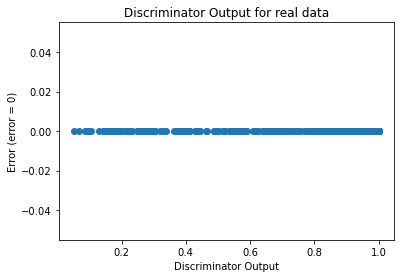

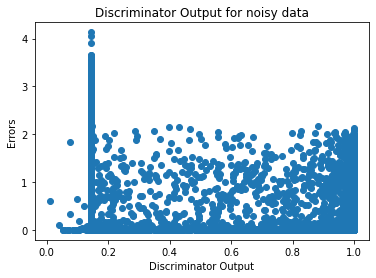

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)